In [9]:
import numpy as np
import matplotlib.pyplot as plt
import camdesign as cd
import pandas as pd

In [10]:
def f_leva(valor): #0.8 0.4
    A_leva = np.pi*0.8*2
    A_piasada = np.pi*0.4*2
    return (valor/A_leva)*A_piasada

def Desplazamiento(valor):
    return valor/(30*0.6**4*np.pi**2)

def RadioLeva(valor):
    return valor + 2

In [11]:
f_pisada = [0, 113, 80, 108, 0, 0]
grados = [0, 57, 125, 200, 260, 360]
desplazamiento = [0, 0, 0, 0, 0, 0]

dict = {'Grados':grados,
        'Fuerza de la pisada - lb':f_pisada}
df_datos = pd.DataFrame(dict)
df_datos['Fuerza de la leva - lb'] = df_datos['Fuerza de la pisada - lb'].apply(f_leva)
df_datos['Desplazamiento'] = df_datos['Fuerza de la leva - lb'].apply(Desplazamiento)
df_datos['Radio de la leva'] = df_datos['Desplazamiento'].apply(RadioLeva)

df_datos

,Grados,Fuerza de la pisada - lb,Fuerza de la leva - lb,Desplazamiento,Radio de la leva
0,0,0,0.0,0.000000,2.000000
1,57,113,56.5,1.472389,3.472389
2,125,80,40.0,1.042399,3.042399
3,200,108,54.0,1.407239,3.407239
4,260,0,0.0,0.000000,2.000000
5,360,0,0.0,0.000000,2.000000


# Gráfica S 

In [12]:
L1 = df_datos.loc[1,'Desplazamiento']
L2 = df_datos.loc[2,'Desplazamiento']
L3 = df_datos.loc[3,'Desplazamiento'] 
L1_2 = L1 - L2
L2_3 = L3 - L2

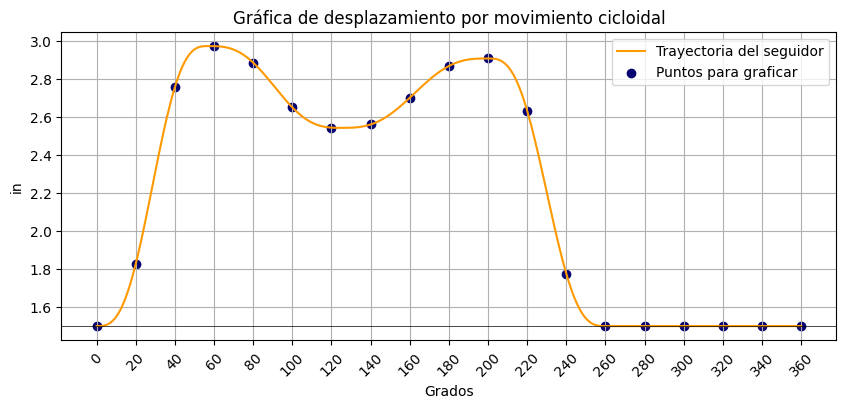

In [13]:
radio_leva = 1.5

x = np.linspace(0,360, 361)
y1 = cd.Cicloidal(L1, x[0:57], 57, "ascenso")
y2 = cd.Cicloidal(L1_2,x[0:68],68, "descenso")
y3 = cd.Cicloidal(L2_3,x[0:75],75, "ascenso")
y4 = cd.Cicloidal(L3,x[0:60],60, "descenso")
y5 = np.zeros(101)
y = np.concatenate([y1, y2 + L2, y3 + L2, y4, y5]) + radio_leva

plt.figure(figsize=(10, 4))

plt.plot(x, y, color = '#FE9900', label = "Trayectoria del seguidor")

theta = x
radio = y

x = np.linspace(0,360, 19)

y = [y[0],
     y[20],
     y[40],
     y[60],
     y[80],
     y[100],
     y[120],
     y[140],
     y[160],
     y[180],
     y[200],
     y[220],
     y[240],
     y[260],
     y[280],
     y[300],
     y[320],
     y[340],
     y[360]]
plt.scatter(x, y, color = '#060270', label = "Puntos para graficar")

plt.grid(True)
plt.xlabel('Grados')
plt.axhline(radio_leva, color='black', linewidth=0.5)
plt.xticks(np.linspace(0,360, 19), rotation = 45)
plt.ylabel('in')
plt.title('Gráfica de desplazamiento por movimiento cicloidal')

plt.legend()
plt.show()

In [14]:
dict = {'Posición angular':x,
        'Desplazamiento': [valor - radio_leva for valor in y],
        'Radio':y}
df_puntos_grafica = pd.DataFrame(dict)
df_puntos_grafica

,Posición angular,Desplazamiento,Radio
0,0.0,0.000000,1.500000
1,20.0,0.327806,1.827806
2,40.0,1.256908,2.756908
3,60.0,1.472147,2.972147
4,80.0,1.385136,2.885136
5,100.0,1.149909,2.649909
6,120.0,1.043512,2.543512
7,140.0,1.060143,2.560143
8,160.0,1.200585,2.700585
9,180.0,1.367696,2.867696


## Perfil de la leva

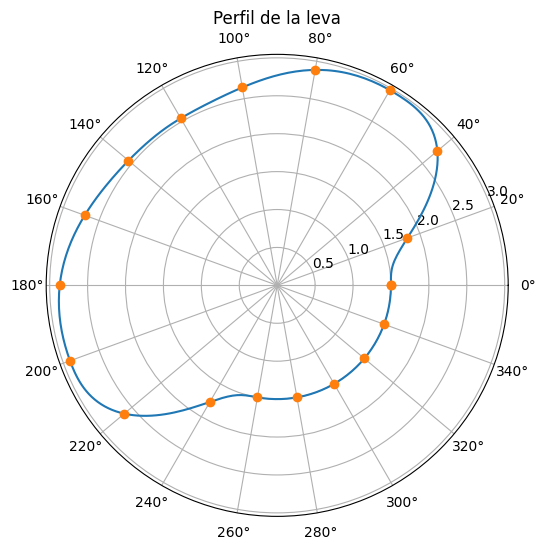

In [15]:
radio_leva = 1.5

x = np.linspace(0,360, 361)
y1 = cd.Cicloidal(L1, x[0:57], 57, "ascenso")
y2 = cd.Cicloidal(L1_2,x[0:68],68, "descenso")
y3 = cd.Cicloidal(L2_3,x[0:75],75, "ascenso")
y4 = cd.Cicloidal(L3,x[0:60],60, "descenso")
y5 = np.zeros(101)
y = np.concatenate([y1, y2 + L2, y3 + L2, y4, y5]) + radio_leva


x = np.radians(x)

plt.figure(figsize=(6, 6))
plt.polar(x, y)

x = np.linspace(0,360, 19)
x = np.radians(x)

y = [y[0],
     y[20],
     y[40],
     y[60],
     y[80],
     y[100],
     y[120],
     y[140],
     y[160],
     y[180],
     y[200],
     y[220],
     y[240],
     y[260],
     y[280],
     y[300],
     y[320],
     y[340],
     y[360]]

plt.polar(x, y, marker = 'o', linestyle='none')
plt.thetagrids(np.arange(0, 360, 20))
plt.title('Perfil de la leva')
plt.show()

## Tabla de puntos 

In [54]:
def RecCoor(radio,theta):
    x = []
    y = []
    for t,r in zip(theta,radio):
        aux = r*np.cos(np.radians(t))
        x.append(aux)
        aux = r*np.sin(np.radians(t))
        y.append(aux)
    return x,y

In [55]:
x_rec, y_rec = RecCoor(radio,theta)

In [61]:
dict = {'X':x_rec,
        'Y':y_rec}
df_MapaPuntos = pd.DataFrame(dict)

# Realiza operaciones directamente con los resultados filtrados

df_MapaPuntos
df_MapaPuntos.head(40)

,X,Y
0,1.500000,0.000000
1,1.499824,0.026180
2,1.499503,0.052364
3,1.499347,0.078577
4,1.499654,0.104866
5,1.500708,0.131295
6,1.502777,0.157948
7,1.506106,0.184927
8,1.510913,0.212345
9,1.517388,0.240331


In [65]:
ruta = './export/mapa_puntos.csv'
df_MapaPuntos.to_csv(ruta, index=False, header=False)
